# Regression: Predicting Average Test Score

In this file, we took data, about food desserts in the United States averaged across census tract per county. We also took data that described average test scores for student in first through eighth grade. We used average family income, food poverty rates, and the kids distance to grocery stores to predict an average test score per county.


In [1]:
import pandas as pd
import numpy as np

DRIVE = False

if DRIVE:
    from google.colab import drive 
    drive.mount('/content/gdrive')
    data_path = "gdrive/My Drive/731-Semester-Project/data/"
else:
    data_path = "../data/"

combined_df = pd.read_csv(data_path + "new_combined_data.csv")

First, members of our group combined data into the file `combined_data.csv` found in the `data` folder. We began by importing the combined data.

In [2]:
combined_df.head()

,Unnamed: 0,Educ_index,Educ_countyid,Educ_fips,Educ_gap_est,Educ_tot_asmts,Educ_cellcount,Educ_mn_asmts,Educ_mn_avg_ol,Educ_mn_grd_ol,...,Food_HUNVFlag,Food_LowIncomeTracts,Food_LA1and10,Food_LAhalfand10,Food_LA1and20,Food_LATracts_half,Food_LATracts1,Food_LATracts10,Food_LATracts20,Food_LATractsVehicle_20
0,0,0,1001,1,0,72864,96,759.000000,5.636815,1.048619,...,0.367558,0.113815,0.712558,0.752323,0.494695,0.534460,0.494695,0.217863,0.0,0.367558
1,1,15,1003,1,0,213214,96,2220.979167,5.428993,0.832481,...,0.131622,0.193888,0.454015,0.477223,0.430768,0.453976,0.430768,0.023246,0.0,0.131622
2,2,30,1005,1,0,26521,96,276.260417,3.692509,0.956793,...,0.478931,0.768438,0.579087,0.579087,0.241760,0.241760,0.241760,0.337327,0.0,0.478931
3,3,44,1007,1,0,25678,96,267.479167,4.235791,0.996612,...,0.382588,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.382588
4,4,56,1009,1,0,71940,96,749.375000,4.689641,0.866955,...,0.387931,0.434510,0.275304,0.275304,0.122989,0.122989,0.122989,0.152315,0.0,0.387931


## Feature Selection 

We looked at different features in the data set to decide which ones would be beneficial to predict test scores. 

First, we looked at what the highest and lowest score possible for students test scores. We found the `Educ_mn_avg_ol` is the students test scores where the highest score was 7.62 and the lowest was 1.90. 

In [3]:
combined_df['Educ_mn_avg_ol'].describe()

count    3057.000000
mean        5.402561
std         0.758703
min         1.899497
25%         4.962986
50%         5.454591
75%         5.920150
max         7.617769
Name: Educ_mn_avg_ol, dtype: float64

`Educ_mn_grd_ol` is the grade slope of the test scores. This is the performance of each grade from one year to the next. For example, the performace of 8th graders from one year to another. We decided not to use this column. 

In [4]:
combined_df['Educ_mn_grd_ol'].describe()

count    2960.000000
mean        0.987060
std         0.116665
min         0.383644
25%         0.915746
50%         0.989539
75%         1.063606
max         1.506569
Name: Educ_mn_grd_ol, dtype: float64

`Educ_mn_coh_ol` is the grade slope of each cohort of students. This feature detailed how students were progressing year after year. In other words, how the same group of students is progressing throughout 1st - 8th grade. 

In [5]:
combined_df['Educ_mn_coh_ol'].describe()

count    2956.000000
mean        0.020232
std         0.071281
min        -0.264747
25%        -0.023801
50%         0.019582
75%         0.063733
max         0.446719
Name: Educ_mn_coh_ol, dtype: float64

We decided to predict scores using the `Educ_mn_avg_ol` feature.

In [6]:
regression_df = pd.DataFrame()

Next, we looked at features in the Food Dessert data set. These are features that begin with Food_. The values in each feature are averaged across census tract per county.

We looked at the features that began with Food_lakids followed by a number, x. These features indicates the percentage of kids in the population that live x distance from the nearest grocery store. For example, in Food_lakids1, this is the share of kids averaged across census tract per county county that live 1 mile from the nearest grocery store.

In [7]:
combined_df['Food_lakids1'].describe()

count      3057.000000
mean       9754.944545
std       17312.243670
min           0.000000
25%        1748.700800
50%        4200.910309
75%        9766.208079
max      283577.452902
Name: Food_lakids1, dtype: float64

In [8]:
combined_df['Food_lakids1share'].describe()

count    3057.000000
mean        0.152029
std         0.046939
min         0.000000
25%         0.121438
50%         0.153799
75%         0.181411
max         0.346546
Name: Food_lakids1share, dtype: float64

In [9]:
combined_df['Food_lakids20share'].describe()

count    3057.000000
mean        0.007484
std         0.032986
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.313558
Name: Food_lakids20share, dtype: float64

We looked at the `Food_ProvertyRate` which is the poverty rate as averaged across the census tract per county. 

In [10]:
combined_df['Food_PovertyRate'].describe()

count    3057.000000
mean       16.879859
std         6.488585
min         1.000000
25%        12.238929
50%        16.178341
75%        20.368075
max        47.862723
Name: Food_PovertyRate, dtype: float64

We looked at the Food_MedianFamilyIncome which is the median family income as averaged across the census tract per county.

In [11]:
combined_df['Food_MedianFamilyIncome'].describe()

count      3057.000000
mean      57549.060469
std       13931.146493
min       26621.941452
25%       48439.901280
50%       55748.513464
75%       63993.126821
max      138964.922115
Name: Food_MedianFamilyIncome, dtype: float64

In [12]:
combined_df.sort_values("Food_MedianFamilyIncome", ascending=False).head(10)

,Unnamed: 0,Educ_index,Educ_countyid,Educ_fips,Educ_gap_est,Educ_tot_asmts,Educ_cellcount,Educ_mn_asmts,Educ_mn_avg_ol,Educ_mn_grd_ol,...,Food_HUNVFlag,Food_LowIncomeTracts,Food_LA1and10,Food_LAhalfand10,Food_LA1and20,Food_LATracts_half,Food_LATracts1,Food_LATracts10,Food_LATracts20,Food_LATractsVehicle_20
2779,2779,35030,51013,51,0,103175,64,1612.109375,6.523900,0.917928,...,0.201429,0.176254,0.046800,0.565789,0.046800,0.565789,0.046800,0.000000,0.0,0.201429
2825,2825,35629,51107,51,0,338648,64,5291.375000,6.634481,1.020663,...,0.036630,0.087096,0.480476,0.839887,0.480476,0.839887,0.480476,0.000000,0.0,0.036630
2801,2801,35305,51059,51,0,845147,64,13205.421875,6.584829,0.963106,...,0.066396,0.169805,0.391112,0.898489,0.391112,0.898489,0.391112,0.000000,0.0,0.066396
1170,1170,14987,24027,24,0,342476,88,3891.772727,7.227595,1.005730,...,0.093655,0.000000,0.441058,0.900378,0.441058,0.900378,0.441058,0.000000,0.0,0.093655
1744,1744,21821,34019,34,0,122870,72,1706.527778,7.545868,1.188554,...,0.123655,0.035692,0.278397,0.365706,0.278397,0.365706,0.278397,0.000000,0.0,0.123655
1752,1752,21936,34035,34,0,301665,72,4189.791667,7.361217,1.188984,...,0.237172,0.097726,0.606683,0.899247,0.606683,0.899247,0.606683,0.000000,0.0,0.237172
1748,1748,21879,34027,34,0,445170,72,6182.916667,7.489791,1.181863,...,0.193150,0.064685,0.667057,0.961353,0.667057,0.961353,0.667057,0.000000,0.0,0.193150
1172,1172,15016,24031,24,0,936461,88,10641.602273,6.561265,1.027317,...,0.169621,0.259676,0.427246,0.853971,0.427246,0.853971,0.427246,0.000000,0.0,0.169621
1770,1770,22180,35028,35,0,18559,71,261.394366,7.366961,1.208370,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000
178,178,2640,6041,6,0,147511,63,2341.444444,6.460801,1.060692,...,0.091419,0.163996,0.330056,0.839843,0.317275,0.827062,0.317275,0.012781,0.0,0.091419


## Feature Engineering

We needed to normalize the Food_PovertyRate and Food_normalized_income to force the values between 0 and 1. This was to ensure the regression would work propertly. We saw Food_PovertyRate ranged from 0-100 so we normalized it by dividing by 100. We normalized Food_MedianFamilyIncome by using the min max scaler from sklearn.

In [13]:
combined_df['Food_PovertyRate'] = combined_df['Food_PovertyRate']/100 

In [14]:
from sklearn.preprocessing import MinMaxScaler

income_scaler = MinMaxScaler()
combined_df['Food_normalized_income'] = income_scaler.fit_transform(np.array(combined_df['Food_MedianFamilyIncome']).reshape(-1, 1))

combined_df['Food_normalized_income'].describe()

count    3057.000000
mean        0.275292
std         0.124005
min         0.000000
25%         0.194208
50%         0.259265
75%         0.332653
max         1.000000
Name: Food_normalized_income, dtype: float64

We made a new dataframe that consisted of the features we thought would help us predict average scores.

In [15]:
regression_df['mean_scores'] = combined_df['Educ_mn_avg_ol']
regression_df['Food_Scaled_Median_Income'] = combined_df['Food_normalized_income']
regression_df['kids_half'] = combined_df['Food_lakidshalfshare']
regression_df['kids1'] = combined_df['Food_lakids1share']
regression_df['kids10'] = combined_df['Food_lakids10share']
regression_df['kids20'] = combined_df['Food_lakids20share']
regression_df

,mean_scores,Food_Scaled_Median_Income,kids_half,kids1,kids10,kids20
0,5.636815,0.333942,0.239710,0.178144,0.032195,0.000000
1,5.428993,0.318511,0.209114,0.167168,0.003452,0.000000
2,3.692509,0.153948,0.178756,0.136675,0.032128,0.000000
3,4.235791,0.139303,0.216634,0.185574,0.003211,0.000000
4,4.689641,0.235421,0.238900,0.225577,0.008306,0.000000
...,...,...,...,...,...,...
3052,5.529081,0.477160,0.218997,0.143338,0.014986,0.012046
3053,6.700046,0.556587,0.165874,0.134248,0.015115,0.004407
3054,6.086742,0.344458,0.260094,0.178910,0.009708,0.000161
3055,6.508509,0.320228,0.150720,0.087367,0.020772,0.016893


In [16]:
import seaborn as sns

In [17]:
data_corr = regression_df.corr()

To better understand the relationship between features, we used the seaborn heatmap. We saw that the mean scores correlates most closely with median family income.

<AxesSubplot:>

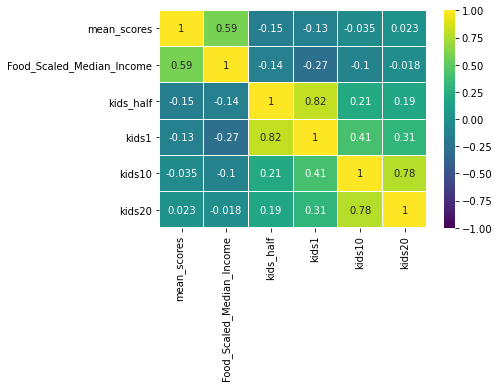

In [18]:
sns.heatmap(data_corr, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

We used a histogram to visualize the distribution of scores before regressions.

<AxesSubplot:xlabel='mean_scores', ylabel='Count'>

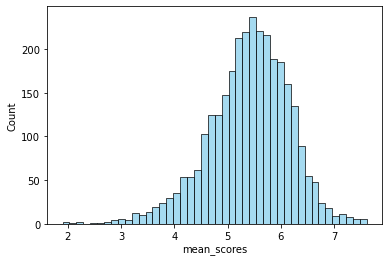

In [19]:
sns.histplot(regression_df.mean_scores, color='skyblue')

In [20]:
X = regression_df.drop(['mean_scores'], axis = 1)
y = regression_df['mean_scores']

In [21]:
y.iloc[876]

6.363935225091102

## Models

We used 4 different regression models to try and predict the mean test scores based on the previously selected features. In order these were, Linear Regression, Ridge Regression, Random Forest, and Gradient Boosting. Of these, Random Forest and Gradient Boosting had the best performance with an average r^2 value of around 0.3 and 0.35 respectively. 

For each model we used KFold Cross validation with 10 splits to train and test our models. The r^2 score of each fold is printed below the respective model.



### Helper Prediction Method

To aid in both our understanding, and for illustrative purposes for our presentation we created a method to predict a specified county (e.g. for Lawrence, we checked Douglas County)

In [22]:
def predict_county(county, state, model):
  idx = combined_df.index[(combined_df['County'] == county) & (combined_df['State'] == state)][0]
  return model.predict([X.iloc[idx]])

### Linear Regression

The first model we trained was Linear Regression. Due to some of the high correlation we saw earlier in the covariance matrix we were hopeful for the performance for Linear Regression. As you can see below, the performance isn't terrible, but it's not great either with an average r^2 score around 0.25. The negative r^2 value for the third fold was concerning as we're not exactly sure what that implies other than a really bad fit, but as you'll see in later models, that seems to be a common trend.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    reg = LinearRegression().fit(X_train, y_train)
    
    print(fold, reg.score(X_test, y_test))
    fold += 1

predict_county('Douglas', 'KS', reg)

1 0.14681080891813514
2 0.42009828218416045
3 -0.21865879593250592
4 0.3050787083656694
5 0.5017120581538841
6 0.2493337583537646
7 0.23619234719201299
8 0.44020065142912146
9 0.36687429425698503
10 0.3804282718489286


array([5.89397114])

Comparing this historgram of our predictions with the overall distribution above we can see that Linear Regression is leaving out some of the lower outliers and predicting some higher scores than are in the original dataset.

<AxesSubplot:ylabel='Count'>

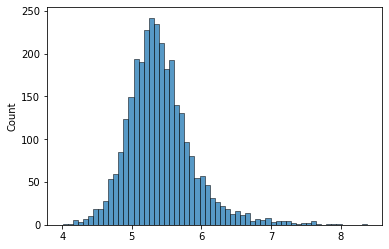

In [24]:
sns.histplot(reg.predict(X))

### Ridge Regression

Again, based on our intution that Linear Regression should perform pretty well due to the covariance matrix, we next tried Ridge Regression since it's based on Linear Regression. However, the performance wasn't that much better than standard Linear Regression with an average r^2 of around 0.26.

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    reg = Ridge().fit(X_train, y_train)
    
    print(fold, reg.score(X_test, y_test))
    fold += 1

predict_county('Douglas', 'KS', reg)

1 0.1300891775506886
2 0.41886088266282406
3 -0.2053160427116203
4 0.2788587386206537
5 0.4859238975679826
6 0.23456230177444304
7 0.2279942701422788
8 0.42589058564843496
9 0.3399647378529822
10 0.4120909298040978


array([5.85344637])

Additionally, as you can see in the prediction distribution, Ridge Regression has an even larger positive shift, ignoring even more of the lower score outliers.

<AxesSubplot:ylabel='Count'>

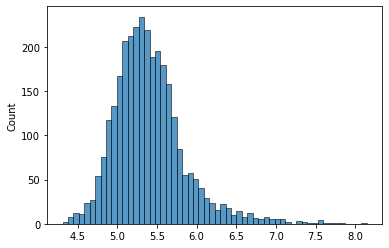

In [26]:
sns.histplot(reg.predict(X))

### Random Forest Regression

Next, we tried Random Forest. The default value of 10 estimators seemed to not be able to account for all the varation in our data and thus we selected 100 for the number of estimators due to it being a good balance between performance and execution time. Overall, Random Forest performed a bit better than Linear Regression and Ridge Regression with an average r^2 value of around 0.30.

In [27]:
from sklearn import datasets, linear_model, metrics

In [28]:
from sklearn.ensemble import RandomForestRegressor
kf = KFold(n_splits=10)

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(X_train, y_train)

    pred = regressor.predict(X_test)
    print(metrics.r2_score(y_test, pred))

predict_county('Douglas', 'KS', regressor)

0.25335427616401873
0.34583319294868675
-0.05642251620301564
0.19834045769561304
0.5825250580663013
0.2653482982450259
0.22646280803075625
0.4354651547877826
0.2607170523925201
0.3641892304013956


array([6.10994114])

Moreover, Random Forest accounted for much more of the variation in our dataset, covering more of the extreme outliers than either of the previous models had.

<AxesSubplot:ylabel='Count'>

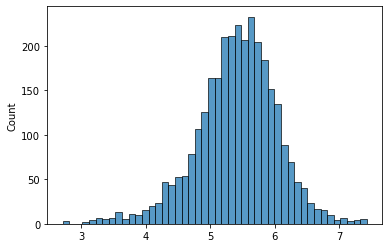

In [29]:
sns.histplot(regressor.predict(X))

### Gradient Boosting

Finally, we tried Gradient Boosting through the use of XGBoost. We used the standard regression metric of `reg:squarederror`, but we had to manually specify it due to a change in the XGBoost library. Overall, this model performed the best with an average r^2 score around 0.35. 

In [30]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')

kf = KFold(n_splits=10)

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = xgboost.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)

    Y_pred = model.predict(X_test)
    print(metrics.r2_score(y_test, Y_pred))

warnings.simplefilter('default')

model.predict(X)[876]

0.232734531078706
0.28101919328792657
-0.16880492599981212
0.1391284493986613
0.533397580373065
0.18555519896774986
0.20722653556424175
0.36954852724293386
0.20094217171982576
0.22883099272455265


6.023418

Again, this distribution looks much more simlar to the actual distribution however it's missing some of the lower outliers that Random Forest picked up.

<AxesSubplot:ylabel='Count'>

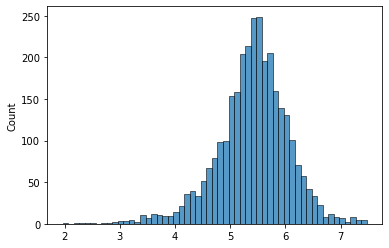

In [31]:
sns.histplot(model.predict(X))

## Conclusions 

Overall, Random Forest had the most acurate distribution of test scores as well as prediction of Douglas County. However, Gradient Boosting was the most accurate with the highest with an r^2 value of 0.35. This still isn't super accurate, but by adding more disparate features in the future we hope we could impove the accuracy.